# Importando bibliotecas

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

pd.set_option('display.min_rows',60)

%matplotlib inline

# Baixando e tratando os dados

In [2]:
padrao = re.compile(r'txt')
texto = []
for p in os.listdir(path='./genius'):
    if not re.search(padrao,p):
        for txt in os.listdir(path=f'./genius/{p}'):
            if re.search(padrao,txt):
                with open(f'./genius/{p}/{txt}', 'r', encoding = 'utf-8') as ep:
                    for ln in ep.read().split('\n'):
                        texto.append(ln)

In [3]:
len(texto)

68166

In [4]:
# Criando o DF
df = pd.DataFrame(texto, columns=['texto'])
# Limpando linhas vazias
df.dropna(inplace=True)
df.drop(df[df['texto']==''].index, inplace=True)
df.reset_index(drop=True, inplace=True)
# Criando a coluna para identificar as conversas
df['conversa'] = df['texto'].apply(lambda x: 0 if ':' not in x or 'CUT TO:' in x or 'EXT:' in x or 'INT:' in x or 'INT.' in x else 1)


In [5]:
# Criando a coluna para identificar cada cena
c=0
cenas = []
for i in range(len(df)):
    c += 1 if df.iloc[i,1] == 0 else 0
    cenas.append(c)

df['cena'] = cenas

In [6]:
# Separando o nome dos personagens
df['personagem'] = df[df['conversa']==1]['texto'].str.split(':')
df['personagem'] = df['personagem'].apply(lambda x: x[0].upper() if type(x) == type(list()) else None)

In [7]:
len(df)

35884

In [58]:
df['personagem_padronizado'].value_counts()

TYRION LANNISTER                                                                                                                                                                                                1849
JON SNOW                                                                                                                                                                                                        1173
DAENERYS TARGARYEN                                                                                                                                                                                              1086
CERSEI LANNISTER                                                                                                                                                                                                1029
JAIME LANNISTER                                                                                                                                     

In [62]:
len(df[df['personagem_padronizado'] == 'JAIME LANNISTER'])

975

## Tratando o De-Para

In [8]:
depara = {
    "TYRION": "TYRION LANNISTER",
    "JON": "JON SNOW",
    "JAIME": "JAIME LANNISTER",
    "CERSEI": "CERSEI LANNISTER",
    "DAENERYS": "DAENERYS TARGARYEN",
    "BRONN": "BRONN",
    "SAM": "SAMWELL TARLY",
    "SANSA": "SANSA STARK",
    "YGRITTE": "YGRITTE",
    "ARYA": "ARYA STARK",
    "THEON": "THEON GREYJOY",
    "VARYS": "VARYS",
    "ROBB": "ROBB STARK",
    "Joffrey" : 'JOFFREY BARATHEON',
    "BRINENNE": 'Brienne de Tarth',
    "BRIENNE": "BRIENNE DE TARTH",
    "JOFFREY": 'JOFFREY BARATHEON',
    "BRAN": 'BRAN STARK',
    "OLENNA": "OLLENA TYRELL",
    "CATELYN": "CATELYN STARK",
    "MARGAERY": "Margaery Tyrell",
    "TYWIN": "Tywin Lannister",
    "STANNIS": 'Stannis Baratheon',
    "DAVOS": 'Davos Seaworth',
    "AEMON": "Meistre Aemon",
    "AERON": "Aeron Greyjoy",
    "AERSON": "Aeron Greyjoy",
    "ALLISER": "Alliser Thorne",
    "ALLISER THORN": "Alliser Thorne",
    "ALLISER THORNE":"Alliser Thorne",
    "ALLISER THORNE": "Alliser Thorne",
    "ALLISER THRONE": "Alliser Thorne",
    "ALLISTER": "Alliser Thorne",
    "ALTON": "Alton Lannister",
    "AMORY": "Amory Lorch",
    "AHSA": "Asha Greyjoy",
    "ANGUY ": "ANGUY",
    "ANGUY": 'ANGUY',
    "ARAY":"ARYA STARK",
    "AREO": "Areo Hotah",
    "ARTHUR": "Arthur Dayne",
    "AYRA": "ARYA STARK",
    "BAELISH": "LITTLEFINGER",
    "BALON": "Balon Greyjoy",
    "BALON DWARF": "Balon Greyjoy",
    "BARRISTAN": "BARRISTAN SELMY",
    "BARRISTON": "BARRISTAN SELMY",
    "BELICHO": "Belicho Paenymion",
    "BRAN": "BRAN STARK",
    "BENJEN": 'BENJEN STARK',
    "BERIC": 'Beric Dondarrion',
    "BRAND": "BRAN STARK",
    "BRANN STARK": "BRAN STARK",
    "BRON": 'BRONN',
    "BRYNDEN":"Brynden Tully",
    "BUER": 'BUYER',
    "CASSEL": "Rodrik Cassel",
    "CATELYIN": 'Catelyn Stark',
    "CATELYN": 'Catelyn Stark',
    "CATELYN STARK" : 'Catelyn Stark',
    "CATELYN" : "Catelyn Stark",
    "CERSEI BARATHEON": "CERSEI LANNISTER",
    "CERSEI LANNISTER": "CERSEI LANNISTER",
    "CERSEL": "CERSEI LANNISTER",
    "CERSIE": "CERSEI LANNISTER",
    "CESEI": "CERSEI LANNISTER",
    "BLACKSMITH"  : 'Gendry Baratheon',
    "BLACKFISH" : "Brynden Tully",
    "COLEN": "Colen of Greenpools",
    "CRESSEN": "Maester Cressen",
    "DAAERIO": 'Daario Naharis',
    "DAARIO": 'Daario Naharis',
    "DAENARYS STORMBORN" : "Daenerys Targaryen",
    "DAENERYS STORMBORN" : "Daenerys Targaryen",
    "DAENERYS TARGARYEN" : "Daenerys Targaryen",
    "DAERNEYS": "Daenerys Targaryen",
    "DAEYNERYS" : "Daenerys Targaryen",
    "DAGMER" : 'Dagmer Cleftjaw',
    "DANAERYS" : "Daenerys Targaryen",
    "DANERYS" : "Daenerys Targaryen",
    "DANY" : "Daenerys Targaryen",
    "DARIO" : 'Daario Naharis',
    "DARRIO" : 'Daario Naharis',
    "DAV OS" : 'Davos Seaworth',
    "DAVOS" : "Davos Seaworth",
    "DEANERYS TARGARIAN" : "Daenerys Targaryen",
    "DENERYS": "Daenerys Targaryen",
    "DERRYK" : "Derrick Darry",
    "DICKON" : "Dickon Tarly",
    "DOLOROUD EDD" : "Eddison Tollett",
    "DOLOROUS EDD" : "Eddison Tollett",
    "DOLROUS EDD" : "Eddison Tollett",
    "ED" : "EDDARD STARK",
    "EDD" : "EDDARD STARK",
    "EDDARD STARK" : 'EDDARD STARK',
    "EDDARK STARK" : 'EDDARD STARK',
    "EDDISION" : "Eddison Tollett",
    "EDDISON" :  "Eddison Tollett",
    "EDMURE" : "EDMURE TULLY",
    "ELARIA" : 'ELLARIA SAND',
    "ELLARIA" : 'ELLARIA SAND',
    "ELLIA" : 'ELIA MARTELL',
    "ERSEI" : "CERSEI LANNISTER",
    "EURION" : "Euron Greyjoy",
    "EURON" : "Euron Greyjoy",
    "GENDRY" : "	GENDRY BARATHEON",
    "GRAND MAESTER PYCELLE" : "Grande Meistre Pycelle",
    "GRAND MAESTER PYRCELLE" : "Grande Meistre Pycelle",
    "GREYWORM" : 'GREY WORM',
    "HIZDAHR" : "HIZDAHR ZO LORAQ",
    "ILLYRIO" : "Illyrio Mopatis",
    "ILLYRIO MOPATIS" : 'Illyrio Mopatis',
    "INNKEEPER" : 'Masha Heddle',
    "JAMIE LANNISTER" : "JAIME LANNISTER",
    "JANOS" : 'JANOS SLYNT',
    "JANOS SLUNT" : 'JANOS SLYNT',
    "JEOR" : "JEOR MORMONT",
    "JOFFFREY" : 'JOFFREY BARATHEON',
    "JOHN" : "JON SNOW",
    "JOJEN" : 'Jojen Reed',
    "JORA" : "JORAH MORMONT",
    "JORAH" : "JORAH MORMONT",
    "KARL" : 'KARL TANNER',
    "KARSTARK" : 'Harald Karstark',
    "KEVAN" : 'KEVAN LANNISTER',
    "KING JOFFREY" : 'JOFFREY BARATHEON',
    'KRAZNYS' : 'KRAZNYS MO NAKLOZ',
    "LADY ANYA" : 'Anya Waynwood',
    "LADY OLENNA" : 'Olenna Tyrell',
    "LADY WALDA" : 'Walda Gorda Frey',
    "LADYC RANE" : 'LADY CRANE',
    "LANCEL" : 'LANCEL LANNISTER',
    "LOLLYS" : 'LOLLYS STOKEWORTH',
    "LOMMY" : 'LOMMY GREENHANDS',
    "LORAS" : '	LORAS TYRELL',
    "LYANNA" : 'LYANNA MORMONT',
    "LYSA" : 'LYSA ARRYN',
    "MACE" : 'MACE TYRELL',
    "MAESTER PYCELL" : "Grande Meistre Pycelle",
    "MAESTER PYCELLE" : "Grande Meistre Pycelle",
    "MARTYN" : 'Martyn Lannister',
    "MARYN TRANT" : 'MERYN TRANT',
    "MERYN" : 'MERYN TRANT',
    "MEERA" : 'MEERA REED',
    "MEISTRE AEMON" : 'MAESTER AEMON',
    "MELISDANDRE" : 'MELISANDRE',
    "MERYN" : 'MERYB TRANT',
    "MHAEGAN" : 'MHAEGEN',
    "MOSADOR" : 'MOSSADOR',
    "MOUNTAIN" : "Gregor Clegane",
    "MOUNTIAN" : "Gregor Clegane",
    "MYRCELLA" : 'MYRCELLA BARATHEON',
    "NED" : 'Eddard Stark',
    "NED STARK" : 'Eddard Stark',
    "OLEANNA" : 'Olenna Tyrell',
    "OLLENA TYRELL" : 'Olenna Tyrell',
    "OTHELL YARWICK" : "OTHELL YARWYCK",
    "PETYR" : 'LITTLEFINGER',
    "PETYR BAELISH" : 'LITTLEFINGER',
    "PYATT PREE" : 'PYAT PREE',
    "PYATTPREE" : 'PYAT PREE',
    "PYCELL" : "Grande Meistre Pycelle",
    "PYCELLE" : "Grande Meistre Pycelle",
    "PYELLE" : "Grande Meistre Pycelle",
    "PYP" : "PYPAR",
    "RAMSAY" : 'RAMSAY BOLTON',
    "RAMSEY" : 'RAMSAY BOLTON',
    "RENLY" : "RENLY BARATHEON",
    "RICKON" : 'RICKON STARK',
    "RHAKARO" : 'RAKHARO',
    "RHAKHARO" : 'RAKHARO',
    "RICKARD" : "RICKARD KARSTARK",
    "RIKON" : 'RICKON STARK',
    "ROBERT" : 'ROBERT BARATHEON',
    "ROBETT" : 'ROBETT GLOVER',
    "ROBIN" : "ROBIN ARRYN",
    "RODRICK CASSEL" : 'RODRIK CASSEL',
    "RODRIK CASSAL" : 'RODRIK CASSEL',
    "RODRIK" : 'RODRIK CASSEL',
    "ROOSE" : 'ROOSE BOLTON',
    "SAAN" : "Salladhor Saan",
    "SALLADHOR" : "Salladhor Saan",
    "SALLADOR" : "Salladhor Saan",
    "SAMMY" : "SAMWELL TARLY",
    "SAMWEL TARLY" : "SAMWELL TARLY",
    "SAMWELL" : "SAMWELL TARLY",
    "SANDOR" : "SANDOR CLEGANE",
    "SER JORAH" : 'Jorah Mormont',
    "SER ALLISER" : 'Alliser Thorne',
    "SER BARRISTAN" : "Barristan Selmy",
    "SER DONTOS" : 'Dontos Hollard',
    "SER RODRIK" : "Rodrik Cassel",
    "SER VARDIS" : 'Vardis Egen',
    "TYRIOM" : 'TYRION LANNISTER',
    "TYRON" :  'TYRION LANNISTER',
    "TYWEN" : 'TYWIN LANNISTER',
    "TWYIN" : 'TYWIN LANNISTER',
    "VISERYS" : 'VISERYS TARGARYEN', 
    "WALDERY FREY" : 'Walder Frey',
    "WALDER FREY" : 'Walder Frey',
}

In [9]:
def upper_dict(dic):
    resultado = {}
    for chave, valor in dic.items():
        upper_chave = chave.upper()
        upper_valor = valor.upper()
        resultado[upper_chave] = upper_valor
    return resultado

Udepara = upper_dict(depara)

In [10]:
df['personagem_padronizado'] = [Udepara[x] if x in Udepara else x for x in df['personagem']]

# Visualizando os dados e tratando os dados

In [11]:
total = df['personagem_padronizado'].value_counts()
lista_personagem = [i.upper() for i in total.index]
indice = [i+1 for i in range(len(total))]
cod_personagem = {i:j.upper() for i,j in enumerate(total.index)}
cod_frequencia = {i:j for i,j in enumerate(total.values)}

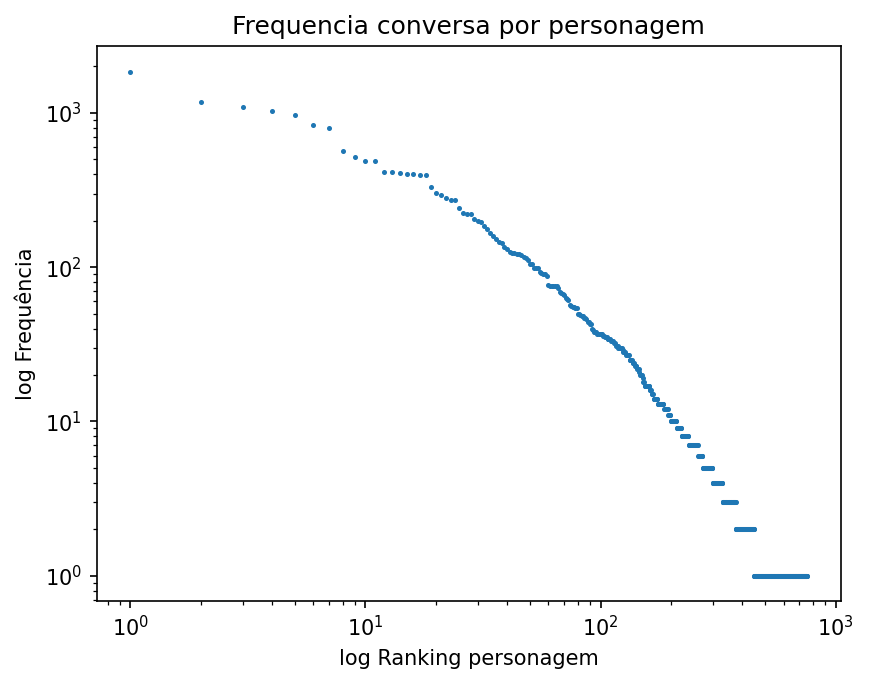

In [12]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=df['personagem_padronizado'].value_counts(), s=2)
plt.title('Frequencia conversa por personagem')
plt.xlabel('log Ranking personagem')
plt.ylabel('log Frequência')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [13]:
total_acumulado = []
for i in range(len(total)) :
    if i == 0:
        total_acumulado.append(total[i])
    else:
        total_acumulado.append(total_acumulado[i-1] + total[i])

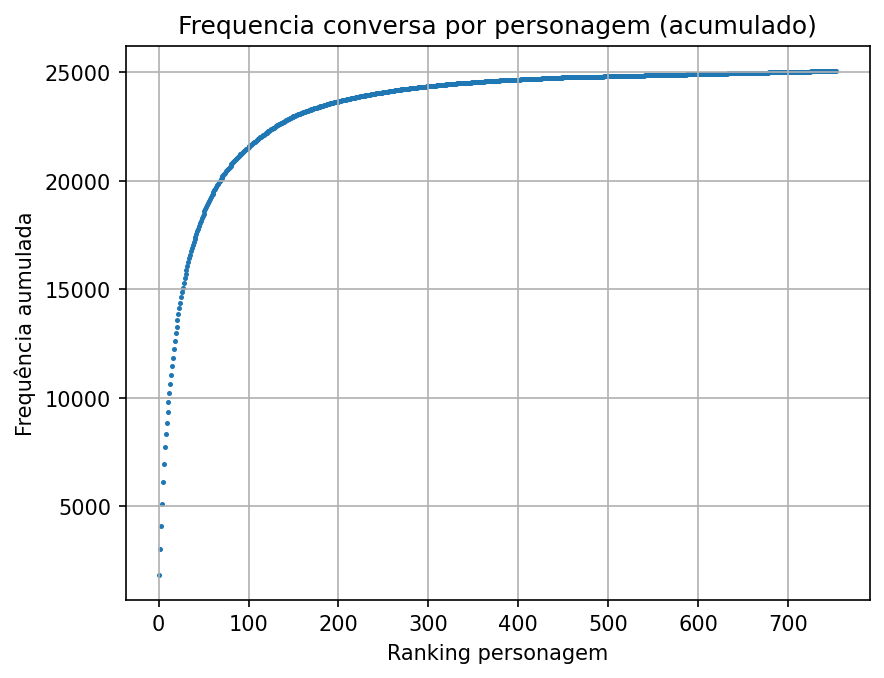

In [14]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=total_acumulado, s=2)
plt.title('Frequencia conversa por personagem (acumulado)')
plt.xlabel('Ranking personagem')
plt.ylabel('Frequência aumulada')
plt.grid()
plt.show()

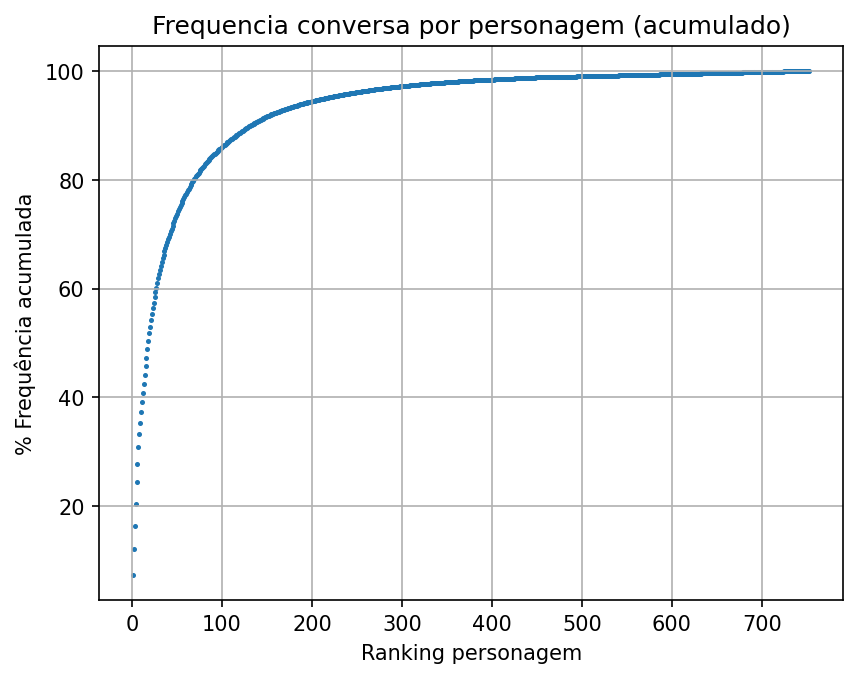

In [15]:
media_total_acumulado = [(i/total_acumulado[-1])*100 for i in total_acumulado ]
plt.figure(dpi=150)
plt.scatter(x=indice, y=media_total_acumulado, s=2)
plt.title('Frequencia conversa por personagem (acumulado)')
plt.xlabel('Ranking personagem')
plt.ylabel('% Frequência acumulada')
plt.grid()
plt.show()

In [16]:
corte = 95 # porcentagem
quantidade = len([i for i in media_total_acumulado if i < corte])

lista_personagem_mais_frequentes = list(total.index)[:quantidade]
len(lista_personagem_mais_frequentes)

lista_personagem_mais_frequentes

['TYRION LANNISTER',
 'JON SNOW',
 'DAENERYS TARGARYEN',
 'CERSEI LANNISTER',
 'JAIME LANNISTER',
 'SANSA STARK',
 'ARYA STARK',
 'SAMWELL TARLY',
 'DAVOS SEAWORTH',
 'THEON GREYJOY',
 'LITTLEFINGER',
 'JORAH MORMONT',
 'VARYS',
 'BRAN STARK',
 'BRONN',
 'BRIENNE DE TARTH',
 'EDDARD STARK',
 'TYWIN LANNISTER',
 'ROBB STARK',
 'CATELYN STARK',
 'STANNIS BARATHEON',
 'MARGAERY TYRELL',
 'RAMSAY BOLTON',
 'JOFFREY BARATHEON',
 'MELISANDRE',
 'SHAE',
 'MAN',
 'TORMUND',
 '\tGENDRY BARATHEON',
 'OLLENA TYRELL',
 'GILLY',
 'MISSANDEI',
 'YGRITTE',
 'DAARIO NAHARIS',
 'THE HOUND',
 'PODRICK',
 'OSHA',
 'YARA',
 'SANDOR CLEGANE',
 'OBERYN',
 'ROOSE BOLTON',
 'GRANDE MEISTRE PYCELLE',
 'TOMMEN',
 'GREY WORM',
 'QYBURN',
 'JAQEN',
 'ROBERT BARATHEON',
 'TALISA',
 'THOROS',
 'BERIC DONDARRION',
 'BARRISTAN SELMY',
 'RENLY BARATHEON',
 'ALLISER THORNE',
 'MEERA REED',
 'SHIREEN',
 'EURON GREYJOY',
 'HOUND',
 'HIGH SPARROW',
 'GRENN',
 'JOJEN REED',
 'LYSA ARRYN',
 '\tLORAS TYRELL',
 'HOT PIE',
 'J

In [17]:
#regex
padrao = re.compile(r'\([^)]*\)')
#removendo parênteses
result = [re.sub(padrao,'',i).strip() for i in lista_personagem_mais_frequentes]

result2 = [Udepara[i] if i in Udepara else i for i in result]
result2 = set(result2)
lista_personagem_tratado = list(result2)
#removendo linhas com parênteses e ponto
remover = ['\t', '.','[',']', 'SOLDIER', 'BOY','GIRL','MAN', 'ALL', 'GUARD', 'CUT', 'EXT', 'INT', '0','1','2','3','4','5']
lista_personagem_final = [i.upper() for i in lista_personagem_tratado if not any(c in i for c in remover)]

print(len(lista_personagem_final))

187


In [18]:
lista_personagem_final

['MACE TYRELL',
 'DORAN',
 'LORD VARYS',
 'LORD MORMONT',
 'CRASTER',
 'RIDER',
 'BRONN',
 'JEOR MORMONT',
 'JORY CASSEL',
 'OLYVAR',
 'YGRITTE',
 'RENNICK',
 'GRENN',
 'TYENE',
 'ARYA STARK',
 'THOROS',
 'POLLIVER',
 'RADZAL MO ERAZ',
 'ROS',
 'OLENNA TYRELL',
 'AMORY LORCH',
 'MARWYN',
 'TYCHO',
 'HOT PIE',
 'RAST',
 'WALDER',
 'KINVARA',
 'VIOLET',
 'DONTOS HOLLARD',
 'ROBIN ARRYN',
 'LOTHAR',
 'MAESTER LUWIN',
 'CATELYN STARK',
 'THREE-EYED RAVEN',
 'DAARIO NAHARIS',
 'SPARROW',
 'MISSANDEI',
 'GREY WORM',
 'WOLKAN',
 'TYWIN LANNISTER',
 'MELESSA',
 'HODOR',
 'MAESTER AEMON',
 'STYR',
 'WINE MERCHANT',
 'ANYA WAYNWOOD',
 'BLACK WALDER',
 'DOREAH',
 'WAIF',
 'DERRICK DARRY',
 'ROBERT BARATHEON',
 'RORGE',
 'KHAL DROGO',
 'RALF',
 'EURON GREYJOY',
 'FARMER HAMLET',
 'DAVOS SEAWORTH',
 'MARGAERY TYRELL',
 'ORELL',
 'SANDOR CLEGANE',
 'ROBETT GLOVER',
 'THE TICKLER',
 'LORD OF BONES',
 'SYRIO FOREL',
 'JAQEN',
 'GREATJON UMBER',
 'LANCEL LANNISTER',
 'AERON GREYJOY',
 'ROZ',
 'LITTLEFI

# Início da criação dos grafos

## Parte inicial e que não muda

In [19]:
import networkx as nx
lista_personagem_final.sort()
index_personagens = [x for x in range(len(lista_personagem_final))]
def recarregar_grafo():
    G = nx.Graph(nome = 'Grafo Game of Thrones')
    G.add_nodes_from(index_personagens)
   
    # criando atributos para cada personagem
    # fala = conta +1 toda vez que o personagem realizou um fala
    # ouviu = conta +1 toda vez que uma fala foi realizada numa cena em que o personagem estava
    # citado = conta +1 toda vez que o personagem for citado em uma fala
    for x in range(len(G)):
        G.nodes[x]['nome'] = lista_personagem_final[x]
        # G.nodes[x]['fala'] = 0
        # G.nodes[x]['ouviu'] = 0
        # G.nodes[x]['citado'] = 0 

    return G

In [20]:
G = recarregar_grafo()

In [21]:
len(index_personagens)

187

In [22]:
print(G)

Graph with 187 nodes and 0 edges


In [23]:
print(G.nodes.data())

[(0, {'nome': 'AERON GREYJOY'}), (1, {'nome': 'ALTON LANNISTER'}), (2, {'nome': 'AMORY LORCH'}), (3, {'nome': 'ANGUY'}), (4, {'nome': 'ANYA WAYNWOOD'}), (5, {'nome': 'ARYA STARK'}), (6, {'nome': 'BALON GREYJOY'}), (7, {'nome': 'BARRISTAN SELMY'}), (8, {'nome': 'BENJEN STARK'}), (9, {'nome': 'BERIC DONDARRION'}), (10, {'nome': 'BLACK LORREN'}), (11, {'nome': 'BLACK WALDER'}), (12, {'nome': 'BOBONO'}), (13, {'nome': 'BRAN STARK'}), (14, {'nome': 'BRIENNE DE TARTH'}), (15, {'nome': 'BRONN'}), (16, {'nome': 'BRYNDEN TULLY'}), (17, {'nome': 'CAMELLO'}), (18, {'nome': 'CAPTAIN'}), (19, {'nome': 'CATELYN STARK'}), (20, {'nome': 'CERSEI LANNISTER'}), (21, {'nome': 'CRASTER'}), (22, {'nome': 'CROWD'}), (23, {'nome': 'DAARIO NAHARIS'}), (24, {'nome': 'DAENERYS TARGARYEN'}), (25, {'nome': 'DAGMER CLEFTJAW'}), (26, {'nome': 'DAVOS SEAWORTH'}), (27, {'nome': 'DERRICK DARRY'}), (28, {'nome': 'DICKON TARLY'}), (29, {'nome': 'DONTOS HOLLARD'}), (30, {'nome': 'DORAN'}), (31, {'nome': 'DOREAH'}), (32, {

## conexão sem peso nem repetição

In [24]:
edges = []
for i in range(df['cena'].max()):
    pers = []
    for p in df[df['cena']==i]['personagem_padronizado'].str.upper():
        pers.append(p) if p in lista_personagem_final else None

    if len(pers) > 0:
        for x in pers:
            for y in pers:
                edge = (lista_personagem_final.index(x), lista_personagem_final.index(y), {'rep': 1})
                edges.append(edge) if x != y else None


print(len(edges))

102064


In [25]:
G.add_edges_from(edges)
print(G)

Graph with 187 nodes and 949 edges


In [26]:
# removendo personagens que não possuem conexão
rmv = []
for i in G.nodes():
    verif = False
    for j in G.edges.data():
        if j[0] == i or j[1] == i:
            verif = True
    if not verif: rmv.append(i)
print(len(rmv))
for x in rmv: G.remove_node(x)

1


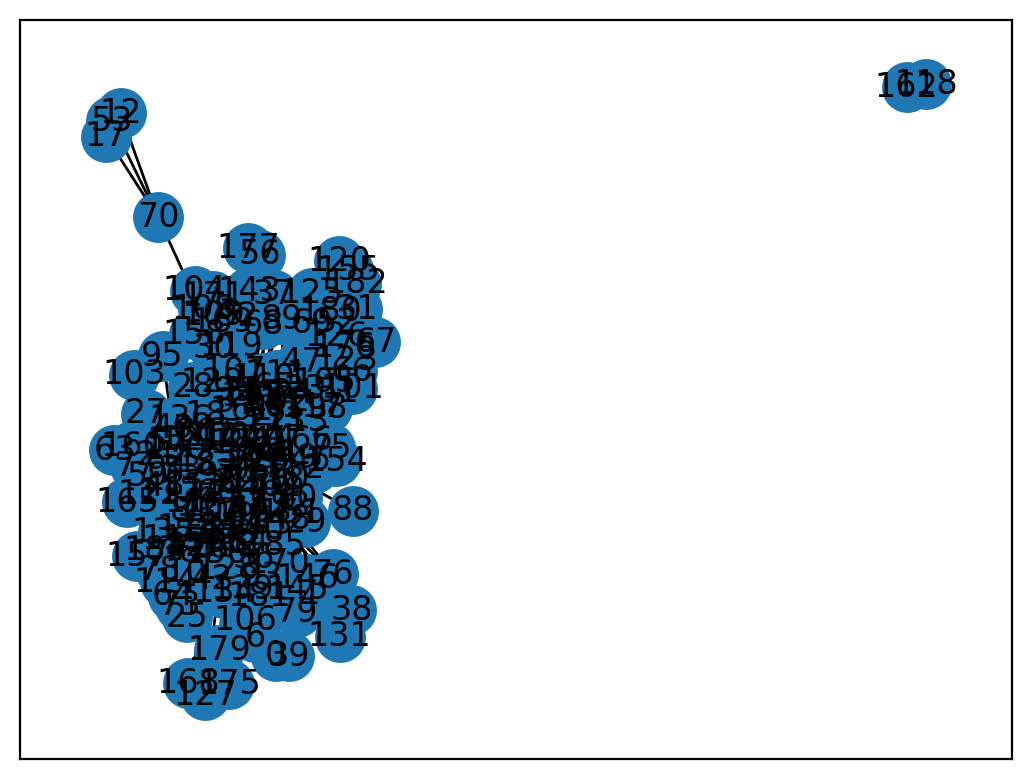

In [27]:
plt.figure(dpi=200)
nx.draw_networkx(G)

In [28]:
for j in G.edges.data():
    if j[0] in [162,118] or j[1] in [118,162]:
        print(j)

(118, 162, {'rep': 1})


In [29]:
# G.remove_edge(196,259)
G.remove_node(162)
G.remove_node(118)

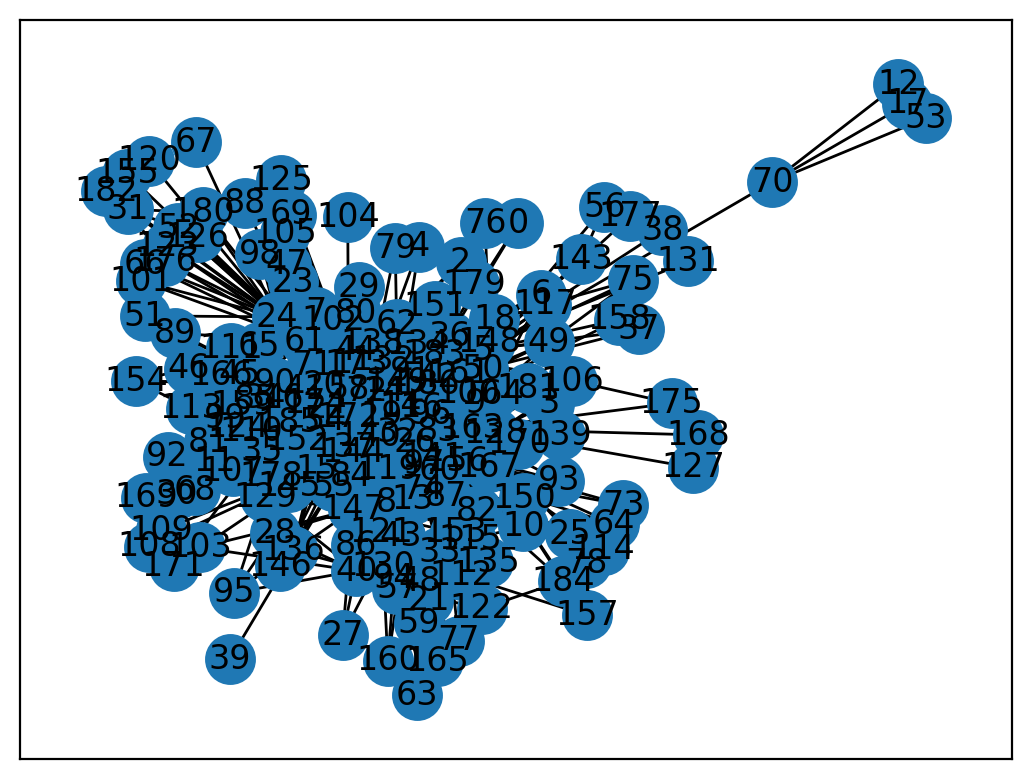

In [30]:
plt.figure(dpi=200)
nx.draw_networkx(G)

In [31]:
lista_degree = dict(G.degree)
lista_degree

{0: 2,
 1: 7,
 2: 3,
 3: 6,
 4: 3,
 5: 43,
 6: 3,
 7: 16,
 8: 7,
 9: 13,
 10: 6,
 11: 7,
 12: 3,
 13: 35,
 14: 28,
 15: 39,
 16: 9,
 17: 3,
 18: 3,
 19: 34,
 20: 43,
 21: 7,
 22: 8,
 23: 9,
 24: 40,
 25: 3,
 26: 30,
 27: 3,
 28: 7,
 29: 4,
 30: 5,
 31: 5,
 32: 34,
 33: 9,
 34: 10,
 35: 16,
 36: 8,
 37: 2,
 38: 1,
 39: 1,
 40: 17,
 41: 23,
 42: 6,
 43: 11,
 44: 17,
 45: 9,
 46: 6,
 47: 6,
 48: 10,
 49: 6,
 50: 11,
 51: 3,
 52: 5,
 53: 3,
 54: 52,
 55: 17,
 56: 3,
 57: 10,
 58: 27,
 59: 8,
 60: 51,
 61: 26,
 62: 7,
 63: 4,
 64: 3,
 65: 8,
 66: 5,
 67: 1,
 68: 2,
 69: 3,
 70: 4,
 71: 16,
 72: 37,
 73: 3,
 74: 14,
 75: 3,
 76: 2,
 77: 3,
 78: 3,
 79: 3,
 80: 6,
 81: 8,
 82: 9,
 83: 11,
 84: 6,
 85: 13,
 86: 8,
 87: 8,
 88: 1,
 89: 2,
 90: 13,
 91: 8,
 92: 2,
 93: 3,
 94: 16,
 95: 4,
 96: 18,
 97: 14,
 98: 5,
 99: 6,
 100: 9,
 101: 4,
 102: 14,
 103: 2,
 104: 1,
 105: 5,
 106: 5,
 107: 9,
 108: 5,
 109: 6,
 110: 10,
 111: 7,
 112: 6,
 113: 7,
 114: 3,
 115: 11,
 116: 15,
 117: 5,
 119: 4,
 

In [32]:
maiores_nos =  sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse=True)[:30]
trinta_maiores_nos = {}
for i in maiores_nos:
    trinta_maiores_nos[str(i[0]) + "-" + lista_personagem_final[i[0]]] = i[1]

trinta_maiores_nos

{'172-TYRION LANNISTER': 69,
 '54-JAIME LANNISTER': 52,
 '60-JON SNOW': 51,
 '149-SANSA STARK': 46,
 '5-ARYA STARK': 43,
 '20-CERSEI LANNISTER': 43,
 '24-DAENERYS TARGARYEN': 40,
 '15-BRONN': 39,
 '72-LITTLEFINGER': 37,
 '163-THEON GREYJOY': 36,
 '13-BRAN STARK': 35,
 '19-CATELYN STARK': 34,
 '32-EDDARD STARK': 34,
 '147-SAMWELL TARLY': 32,
 '26-DAVOS SEAWORTH': 30,
 '14-BRIENNE DE TARTH': 28,
 '58-JOFFREY BARATHEON': 27,
 '174-VARYS': 27,
 '61-JORAH MORMONT': 26,
 '41-GRANDE MEISTRE PYCELLE': 23,
 '137-ROBB STARK': 23,
 '167-TORMUND': 21,
 '96-MELISANDRE': 18,
 '40-GILLY': 17,
 '44-GREY WORM': 17,
 '55-JANOS SLYNT': 17,
 '173-TYWIN LANNISTER': 17,
 '7-BARRISTAN SELMY': 16,
 '35-ELLARIA SAND': 16,
 '71-LANCEL LANNISTER': 16}

In [33]:
print(list(nx.all_shortest_paths(G,source=136, target=35)))

[[136, 54, 35]]


In [34]:
print(nx.diameter(G))
print(nx.is_connected(G))
print(nx.number_connected_components(G))

5
True
1


In [35]:
print(list(nx.clustering(G).values()))

[1.0, 0.5238095238095238, 0.6666666666666666, 0.8, 1.0, 0.1937984496124031, 1.0, 0.375, 0.6190476190476191, 0.5256410256410257, 0.5333333333333333, 0.7142857142857143, 1.0, 0.280672268907563, 0.3333333333333333, 0.14709851551956815, 0.6666666666666666, 1.0, 0.6666666666666666, 0.2905525846702317, 0.23809523809523808, 0.38095238095238093, 0.42857142857142855, 0.7222222222222222, 0.17692307692307693, 1.0, 0.3103448275862069, 1.0, 0.6666666666666666, 1.0, 0.8, 0.5, 0.27450980392156865, 0.5833333333333334, 0.5555555555555556, 0.3333333333333333, 0.5357142857142857, 1.0, 0, 0, 0.2426470588235294, 0.42292490118577075, 0.8, 0.5636363636363636, 0.47794117647058826, 0.6944444444444444, 0.6666666666666666, 0.8, 0.5111111111111111, 0.4666666666666667, 0.41818181818181815, 0.6666666666666666, 0.8, 1.0, 0.1885369532428356, 0.39705882352941174, 0.6666666666666666, 0.4888888888888889, 0.38746438746438744, 0.5714285714285714, 0.18901960784313726, 0.23384615384615384, 0.7619047619047619, 0.333333333333

In [36]:
print(nx.average_clustering(G))

0.6049730369140497


## testando com conexão simples

In [91]:
G_simples = recarregar_grafo()

In [92]:
G_simples.nodes.data()

NodeDataView({0: {'nome': 'AERON GREYJOY'}, 1: {'nome': 'ALTON LANNISTER'}, 2: {'nome': 'AMORY LORCH'}, 3: {'nome': 'ANGUY'}, 4: {'nome': 'ANYA WAYNWOOD'}, 5: {'nome': 'ARYA STARK'}, 6: {'nome': 'BALON GREYJOY'}, 7: {'nome': 'BARRISTAN SELMY'}, 8: {'nome': 'BENJEN STARK'}, 9: {'nome': 'BERIC DONDARRION'}, 10: {'nome': 'BLACK LORREN'}, 11: {'nome': 'BLACK WALDER'}, 12: {'nome': 'BOBONO'}, 13: {'nome': 'BRAN STARK'}, 14: {'nome': 'BRIENNE DE TARTH'}, 15: {'nome': 'BRONN'}, 16: {'nome': 'BRYNDEN TULLY'}, 17: {'nome': 'CAMELLO'}, 18: {'nome': 'CAPTAIN'}, 19: {'nome': 'CATELYN STARK'}, 20: {'nome': 'CERSEI LANNISTER'}, 21: {'nome': 'CRASTER'}, 22: {'nome': 'CROWD'}, 23: {'nome': 'DAARIO NAHARIS'}, 24: {'nome': 'DAENERYS TARGARYEN'}, 25: {'nome': 'DAGMER CLEFTJAW'}, 26: {'nome': 'DAVOS SEAWORTH'}, 27: {'nome': 'DERRICK DARRY'}, 28: {'nome': 'DICKON TARLY'}, 29: {'nome': 'DONTOS HOLLARD'}, 30: {'nome': 'DORAN'}, 31: {'nome': 'DOREAH'}, 32: {'nome': 'EDDARD STARK'}, 33: {'nome': 'EDDISON TOLLE

In [93]:
edges_simples = []
for i in range(df['cena'].max()):
    pers = []
    for p in df[df['cena']==i]['personagem_padronizado'].str.upper():
        pers.append(p) if p in lista_personagem_final else None

    if len(pers) > 0:
        for x in pers:
            for y in pers:
                edge = (lista_personagem_final.index(x), lista_personagem_final.index(y), {'rep': 1})
                edges_simples.append(edge[:2]) if x != y else None


print(len(edges_simples))

102064


In [94]:
G_simples.add_edges_from(edges_simples)
print(G_simples)

Graph with 187 nodes and 949 edges


In [95]:
# removendo personagens que não possuem conexão
rmv = []
for i in G_simples.nodes():
    verif = False
    for j in G_simples.edges.data():
        if j[0] == i or j[1] == i:
            verif = True
    if not verif: rmv.append(i)
print(len(rmv))
for x in rmv: G_simples.remove_node(x)

1


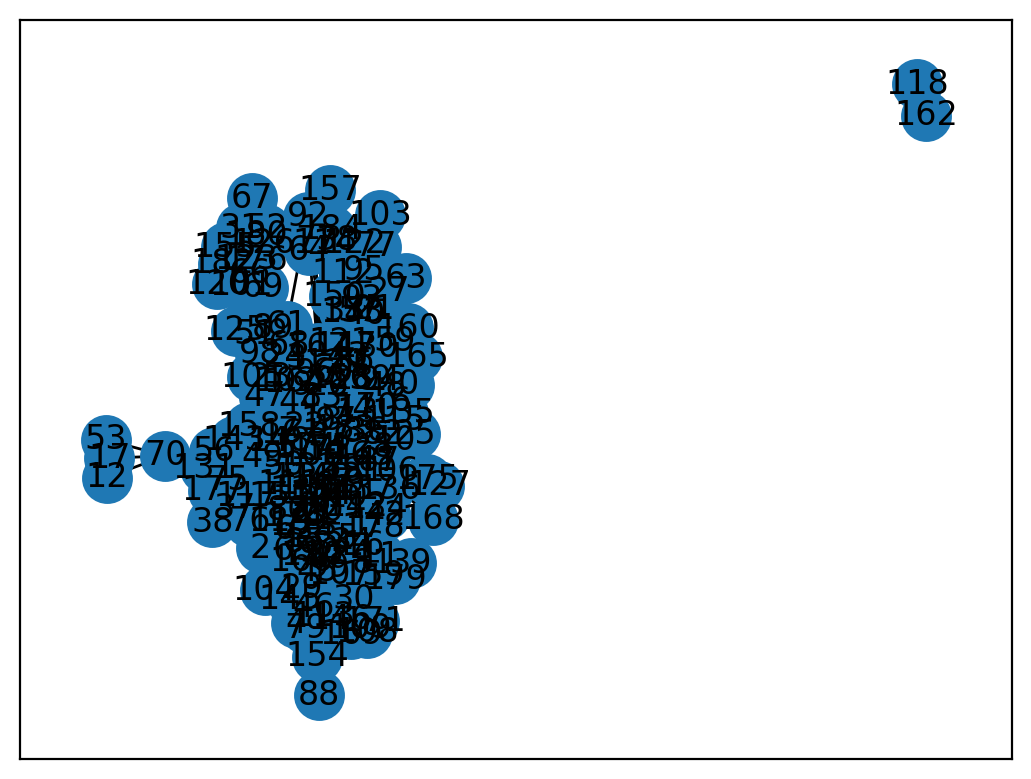

In [96]:
plt.figure(dpi=200)
nx.draw_networkx(G_simples)

In [97]:
G_simples.remove_node(118)
G_simples.remove_node(162)
G_simples.remove_node(53)
G_simples.remove_node(12)
G_simples.remove_node(17)

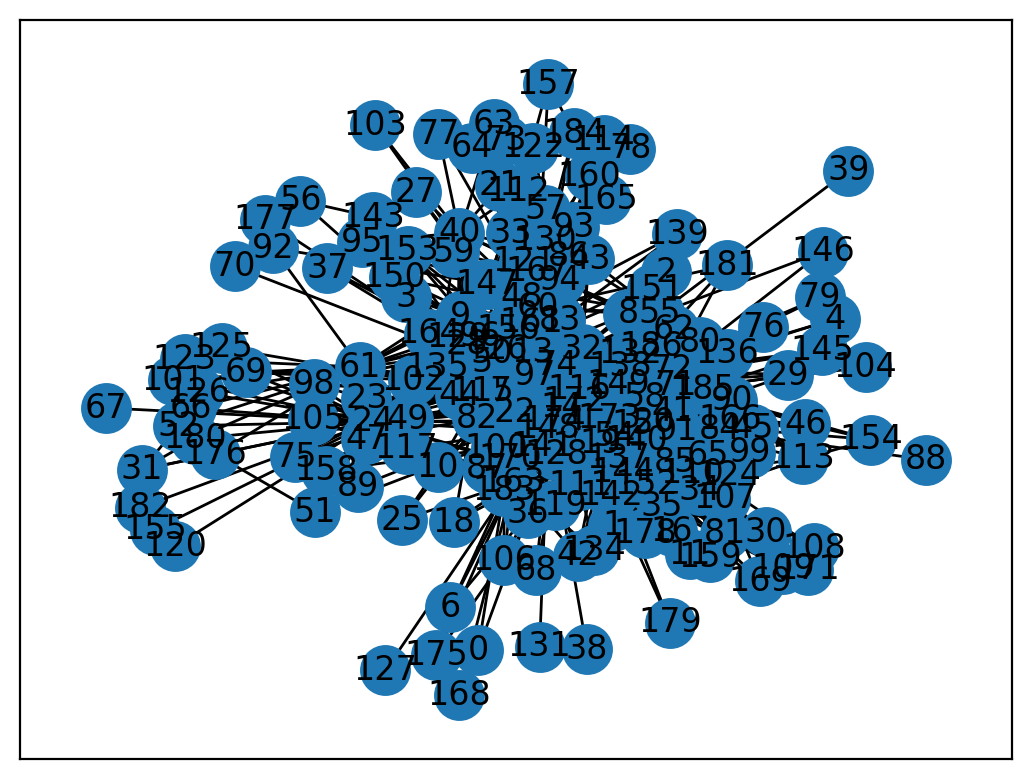

In [98]:
plt.figure(dpi=200)
nx.draw_networkx(G_simples)

In [99]:
lista = dict(G_simples.degree)
lista

{0: 2,
 1: 7,
 2: 3,
 3: 6,
 4: 3,
 5: 43,
 6: 3,
 7: 16,
 8: 7,
 9: 13,
 10: 6,
 11: 7,
 13: 35,
 14: 28,
 15: 39,
 16: 9,
 18: 3,
 19: 34,
 20: 43,
 21: 7,
 22: 8,
 23: 9,
 24: 40,
 25: 3,
 26: 30,
 27: 3,
 28: 7,
 29: 4,
 30: 5,
 31: 5,
 32: 34,
 33: 9,
 34: 10,
 35: 16,
 36: 8,
 37: 2,
 38: 1,
 39: 1,
 40: 17,
 41: 23,
 42: 6,
 43: 11,
 44: 17,
 45: 9,
 46: 6,
 47: 6,
 48: 10,
 49: 6,
 50: 11,
 51: 3,
 52: 5,
 54: 52,
 55: 17,
 56: 3,
 57: 10,
 58: 27,
 59: 8,
 60: 51,
 61: 26,
 62: 7,
 63: 4,
 64: 3,
 65: 8,
 66: 5,
 67: 1,
 68: 2,
 69: 3,
 70: 1,
 71: 16,
 72: 37,
 73: 3,
 74: 14,
 75: 3,
 76: 2,
 77: 3,
 78: 3,
 79: 3,
 80: 6,
 81: 8,
 82: 9,
 83: 11,
 84: 6,
 85: 13,
 86: 8,
 87: 8,
 88: 1,
 89: 2,
 90: 13,
 91: 8,
 92: 2,
 93: 3,
 94: 16,
 95: 4,
 96: 18,
 97: 14,
 98: 5,
 99: 6,
 100: 9,
 101: 4,
 102: 14,
 103: 2,
 104: 1,
 105: 5,
 106: 5,
 107: 9,
 108: 5,
 109: 6,
 110: 10,
 111: 7,
 112: 6,
 113: 7,
 114: 3,
 115: 11,
 116: 15,
 117: 5,
 119: 4,
 120: 3,
 121: 10,
 122: 

{'AERON GREYJOY': 2, 'ALTON LANNISTER': 7, 'AMORY LORCH': 3, 'ANGUY': 6, 'ANYA WAYNWOOD': 3, 'ARYA STARK': 43, 'BALON GREYJOY': 3, 'BARRISTAN SELMY': 16, 'BENJEN STARK': 7, 'BERIC DONDARRION': 13, 'BLACK LORREN': 6, 'BLACK WALDER': 7, 'BRAN STARK': 35, 'BRIENNE DE TARTH': 28, 'BRONN': 39, 'BRYNDEN TULLY': 9, 'CAPTAIN': 3, 'CATELYN STARK': 34, 'CERSEI LANNISTER': 43, 'CRASTER': 7, 'CROWD': 8, 'DAARIO NAHARIS': 9, 'DAENERYS TARGARYEN': 40, 'DAGMER CLEFTJAW': 3, 'DAVOS SEAWORTH': 30, 'DERRICK DARRY': 3, 'DICKON TARLY': 7, 'DONTOS HOLLARD': 4, 'DORAN': 5, 'DOREAH': 5, 'EDDARD STARK': 34, 'EDDISON TOLLETT': 9, 'EDMURE TULLY': 10, 'ELLARIA SAND': 16, 'EURON GREYJOY': 8, 'FARMER HAMLET': 2, 'GATINS': 1, 'GENDRY BARATHEON': 1, 'GILLY': 17, 'GRANDE MEISTRE PYCELLE': 23, 'GREATJON UMBER': 6, 'GRENN': 11, 'GREY WORM': 17, 'HIGH SEPTON': 9, 'HIGH SPARROW': 6, 'HIZDAHR ZO LORAQ': 6, 'HODOR': 10, 'HOT PIE': 6, 'HOUND': 11, 'ILLYRIO MOPATIS': 3, 'IRRI': 5, 'JAIME LANNISTER': 52, 'JANOS SLYNT': 17, 'J

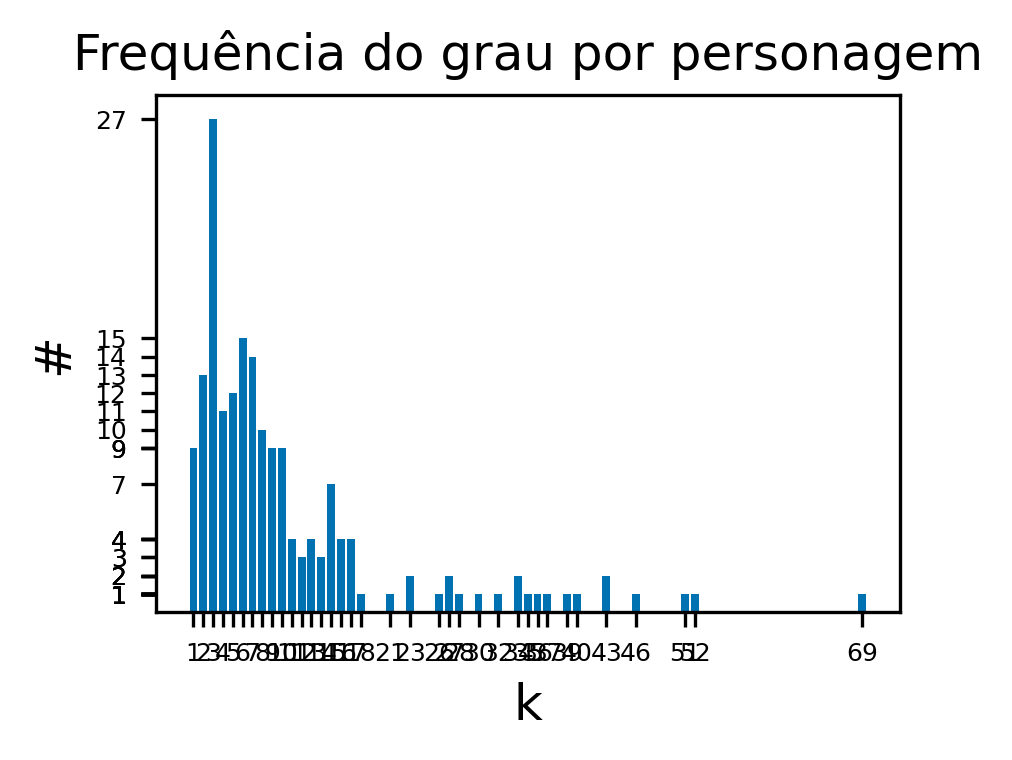

In [100]:
list_of_degrees = list(dict(G_simples.degree).values())
counter = Counter(list_of_degrees)
print({lista_personagem_final[x]: lista[x] for x in lista})


x = list(counter.keys())
y = list(counter.values())

def plot_bar(x,y):
    figx = 3.2
    figy = (7/10)*figx
    fig, ax = plt.subplots(figsize=(figx,figy),dpi=300)
    myplot = ax.bar(x,
                    y,
                    color = '#0072B2',
                    align = 'center')

    ax.set_xlabel('k',fontsize='12')
    ax.set_ylabel('#',fontsize='12')

    ax.set_xticks(x)
    ax.set_yticks(y)

    ax.set_xticklabels(x,fontsize='6')
    ax.set_yticklabels(y,fontsize='6')
    
    ax.set_title('Frequência do grau por personagem')

plot_bar(x,y)

{0: 0.006552509429807896, 1: 0.04866573088376358, 2: 0.016444751717180274, 3: 0.025183598126318516, 4: 0.02047283561287894, 5: 0.18780568180534526, 6: 0.014005061251360789, 7: 0.0790012348331505, 8: 0.05104203039411892, 9: 0.0657970383767589, 10: 0.0250902486075821, 11: 0.03069883875821485, 13: 0.17498231744022993, 14: 0.16524974004591825, 15: 0.15332814418192506, 16: 0.042527130552728706, 18: 0.027282959474927048, 19: 0.1797597285016362, 20: 0.20953661723724906, 21: 0.026459191439317485, 22: 0.04794373867509246, 23: 0.04035217953693478, 24: 0.14847928560566773, 25: 0.016877564606896604, 26: 0.15626595253601047, 27: 0.016246267021780943, 28: 0.043009483407812625, 29: 0.03681442100998659, 30: 0.025275243315415214, 31: 0.009229117119573775, 32: 0.18049901892660977, 33: 0.04152090995826945, 34: 0.05722667453936846, 35: 0.07465599773993128, 36: 0.057214739883590424, 37: 0.011921097316470548, 38: 0.004049929913876232, 39: 0.004844818359483103, 40: 0.04988992793520804, 41: 0.1293706380439845

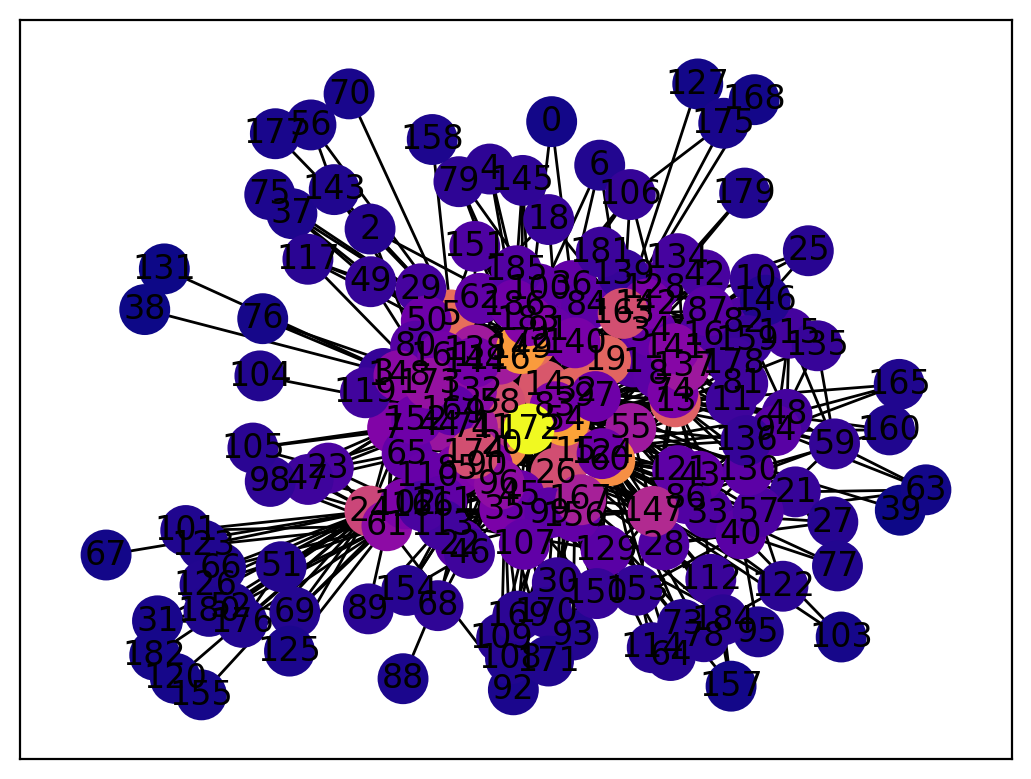

In [101]:
eigenvector_centrality = nx.eigenvector_centrality(G_simples)

print(eigenvector_centrality)

def plot_network(G,x):
    fig,ax = plt.subplots(dpi=200)
    pos = nx.spring_layout(G_simples,
                           seed=42)

    nx.draw_networkx(G_simples,
                     pos,
                     cmap=plt.cm.plasma,
                     node_color=list(x.values()),
                     nodelist=x.keys())

plot_network(G_simples, eigenvector_centrality)

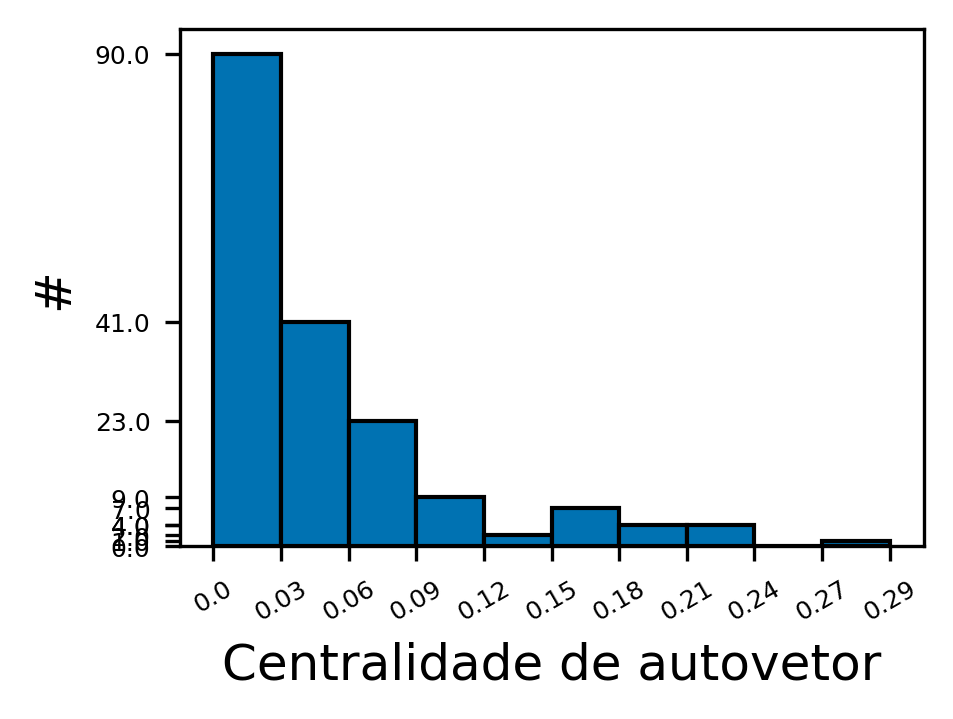

In [102]:
def plot_hist(x,xlabel):
    figx = 3.2
    figy = (7/10)*figx
    fig, ax = plt.subplots(figsize=(figx,figy),dpi=300)
    n, bins, patches = ax.hist(x,
                               color='#0072B2',
                               edgecolor='#000000')

    ax.set_xlabel(xlabel,fontsize='12')
    ax.set_ylabel('#',fontsize='12')

#     delta = bins[1] - bins[0]
#     ax.set_xticks(bins[:-1] + delta/2)
#     ax.set_yticks(n)
#     xticklabels = [round(X,2) for X in bins[:-1] + delta/2]

    ax.set_xticks(bins)
    ax.set_yticks(n)
    xticklabels = [round(b,2) for b in bins]

    ax.set_xticklabels(xticklabels,fontsize='6',rotation=30)
    ax.set_yticklabels(n,fontsize='6')

plot_hist(eigenvector_centrality.values(),'Centralidade de autovetor')

In [103]:
katz_centrality = nx.katz_centrality(G_simples)

plot_network(G_simples,katz_centrality)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

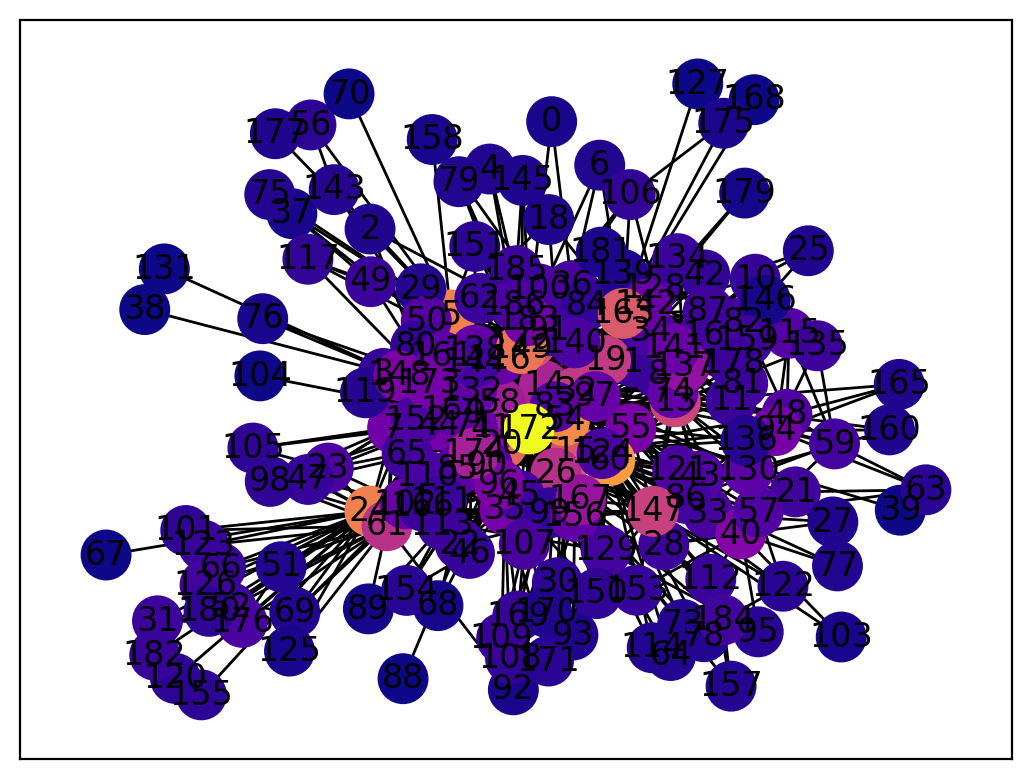

In [104]:
pagerank = nx.pagerank(G_simples)

plot_network(G_simples,pagerank)

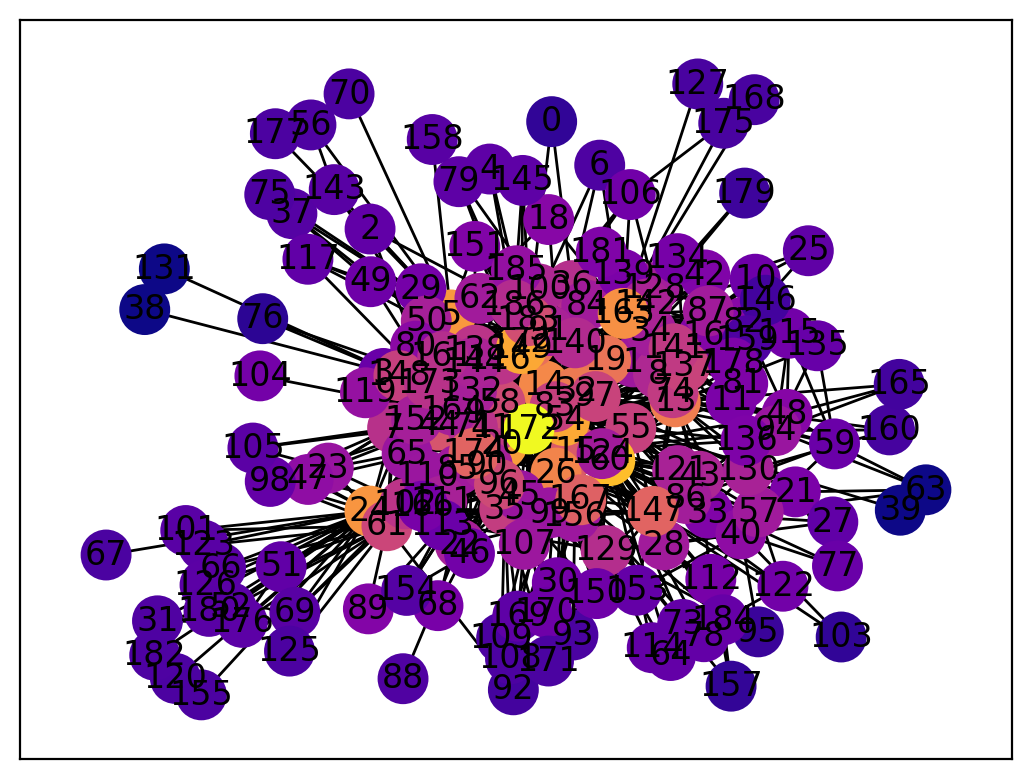

In [105]:
closeness_centrality = nx.closeness_centrality(G_simples)

plot_network(G_simples,closeness_centrality)

In [108]:
r_grau = nx.degree_assortativity_coefficient(G_simples)
r_grau

-0.13553742566836702

## testando com conexão com peso

In [45]:
edges_soma = {}
for i in edges:
    c1, c2, rep = i
    edges_soma[(c1,c2)] = edges_soma.get((c1,c2),0) + rep['rep']

len(edges_soma)

1898